
# 📊 Exploratory Data Analysis (EDA)
**Project:** Прогнозування Відтоку Клієнтів  
**Author:** Andrii Derenhovskyi  
**Team Lead:** Vitalii Subbotin  
**Date:** 2025-10-09
---


In [2]:

# ============================================
#  Імпорт бібліотек
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:

# ============================================
#  Завантаження даних
# ============================================
data_path = "../data/internet_service_churn.csv"
df = pd.read_csv(data_path, index_col=False)

print("🔹 Розмір датасету:", df.shape)
df.head()

🔹 Розмір датасету: (72274, 11)


,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [6]:

# ============================================
#  Загальна інформація про дані
# ============================================
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


🔹 Кількість пропусків:
id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64


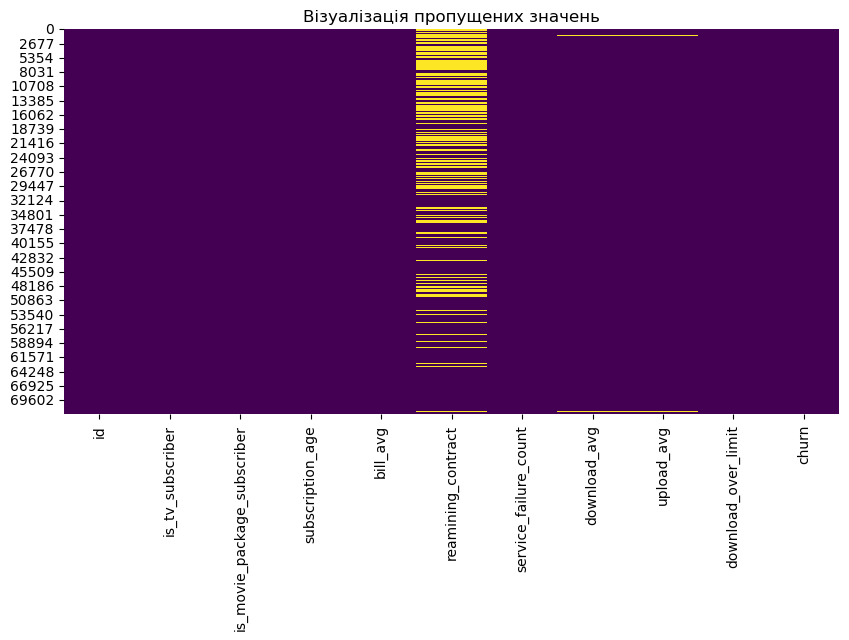

In [7]:

# ============================================
#  Перевірка пропущених значень
# ============================================
print("🔹 Кількість пропусків:")
print(df.isnull().sum())

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Візуалізація пропущених значень")
plt.show()

In [14]:

# ============================================
#  Описова статистика
# ============================================
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,72274.0,846318.243462,489102.168744,15.00,422216.50,847784.00,1269562.00,1689744.00
is_tv_subscriber,72274.0,0.815259,0.388090,0.00,1.00,1.00,1.00,1.00
is_movie_package_subscriber,72274.0,0.334629,0.471864,0.00,0.00,0.00,1.00,1.00
subscription_age,72274.0,2.450051,2.034990,-0.02,0.93,1.98,3.30,12.80
bill_avg,72274.0,18.942483,13.215386,0.00,13.00,19.00,22.00,406.00
reamining_contract,50702.0,0.716039,0.697102,0.00,0.00,0.57,1.31,2.92
service_failure_count,72274.0,0.274234,0.816621,0.00,0.00,0.00,0.00,19.00
download_avg,71893.0,43.689911,63.405963,0.00,6.70,27.80,60.50,4415.20
upload_avg,71893.0,4.192076,9.818896,0.00,0.50,2.10,4.80,453.30
download_over_limit,72274.0,0.207613,0.997123,0.00,0.00,0.00,0.00,7.00


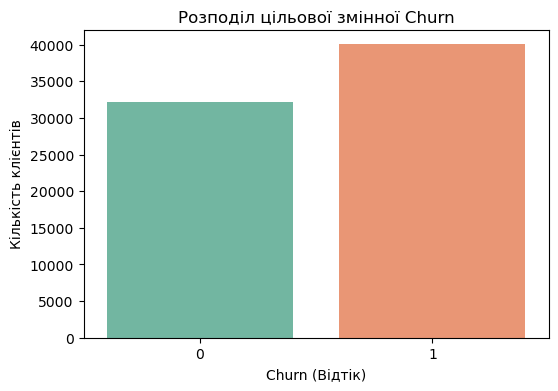

In [12]:

# ============================================
#  Розподіл цільової змінної
# ============================================
plt.figure(figsize=(6,4))
sns.countplot(x="churn", data=df, palette="Set2", hue="churn", legend=False)
plt.title("Розподіл цільової змінної Churn")
plt.xlabel("Churn (Відтік)")
plt.ylabel("Кількість клієнтів")
plt.show()

In [16]:
discrete_variables = ['service_failure_count', 'download_over_limit']
continuous_variables = ['subscription_age', 'bill_avg', 'reamining_contract', 'download_avg', 'upload_avg']
categorical_variables = ['is_tv_subscriber', 'is_movie_package_subscriber']

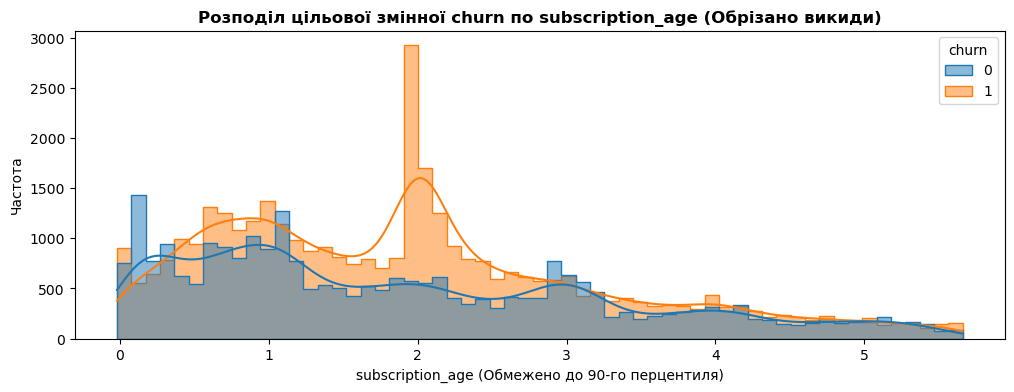

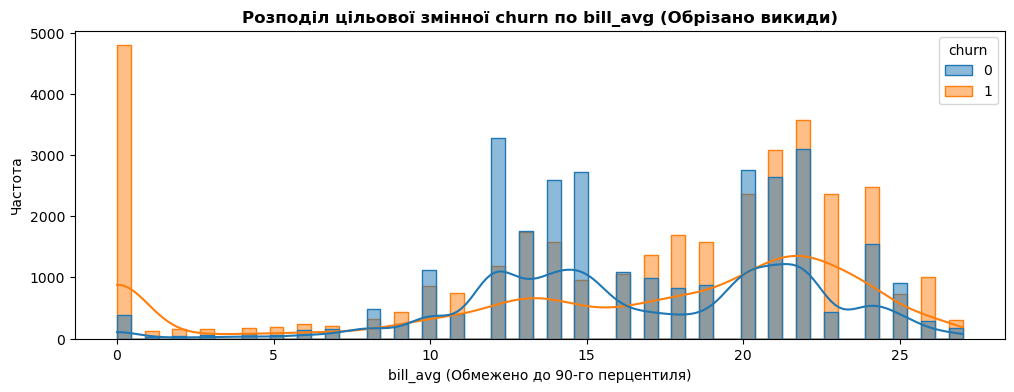

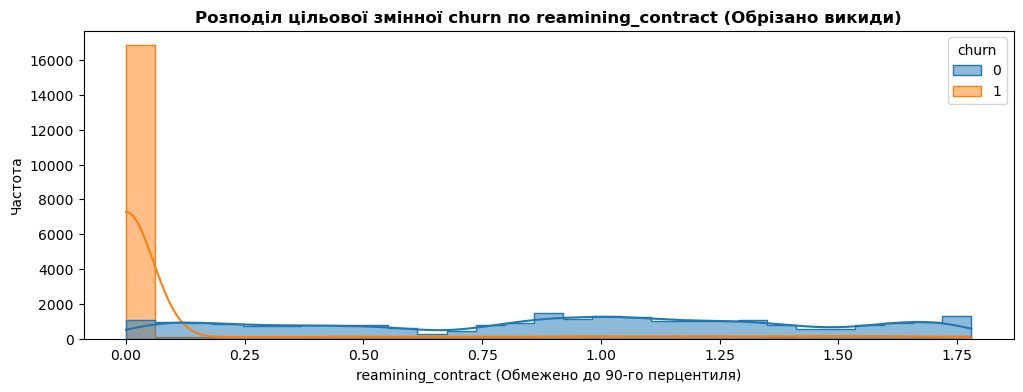

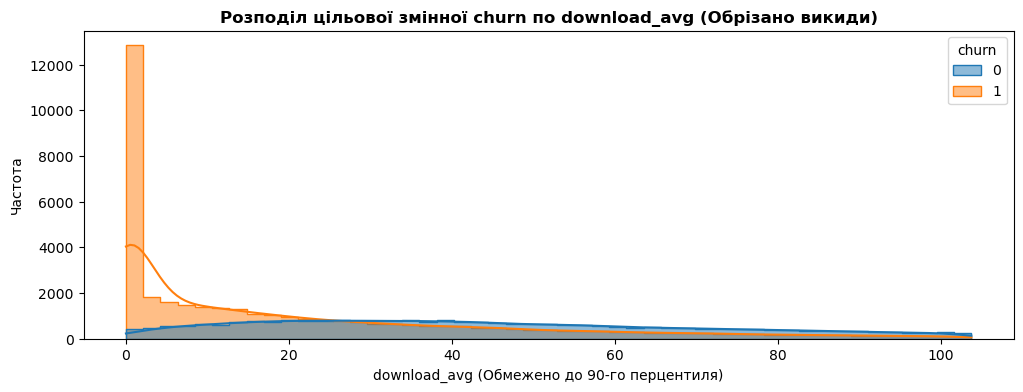

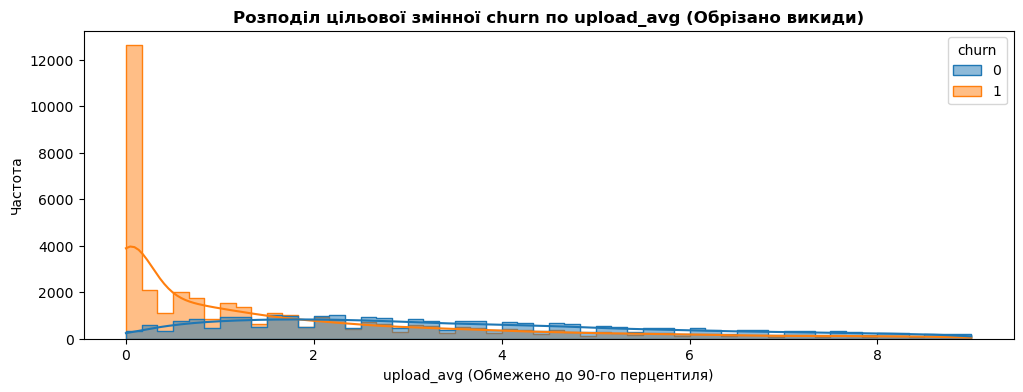

In [25]:
quantile_level = 0.90
for var in continuous_variables:
    limit = df[var].dropna().quantile(quantile_level) 
    df_limited = df[df[var] < limit]
    plt.figure(figsize=(12, 4))
    sns.histplot(data=df_limited, x=var, hue='churn', kde=True, element='step', alpha=0.5)
    
    plt.xlabel(f'{var} (Обмежено до {quantile_level*100:.0f}-го перцентиля)')
    plt.ylabel('Частота')
    plt.title(f'Розподіл цільової змінної churn по {var} (Обрізано викиди)', fontweight='bold')
    plt.show()

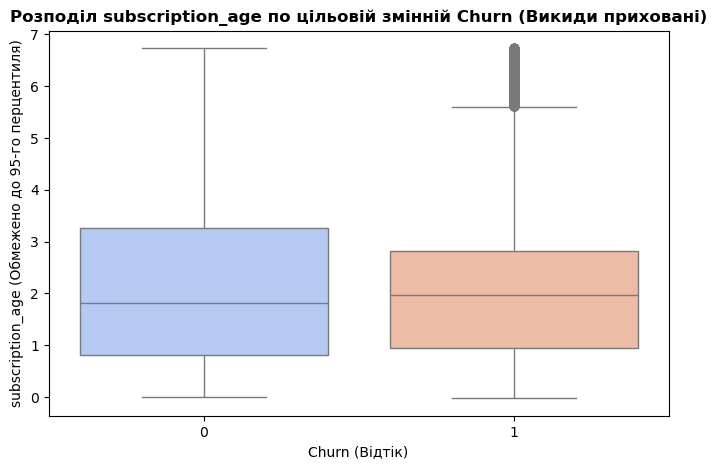

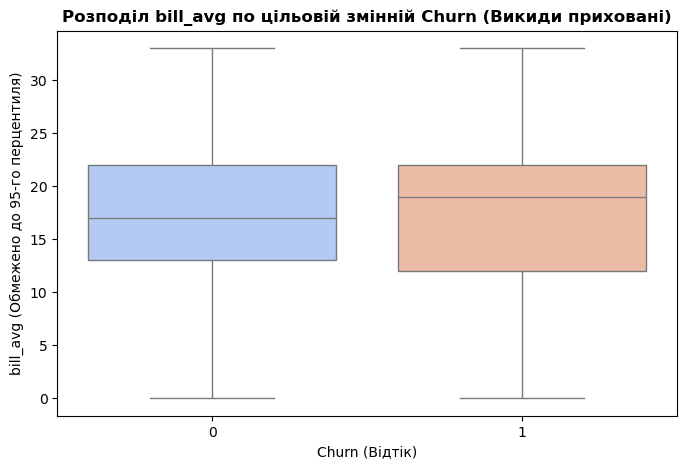

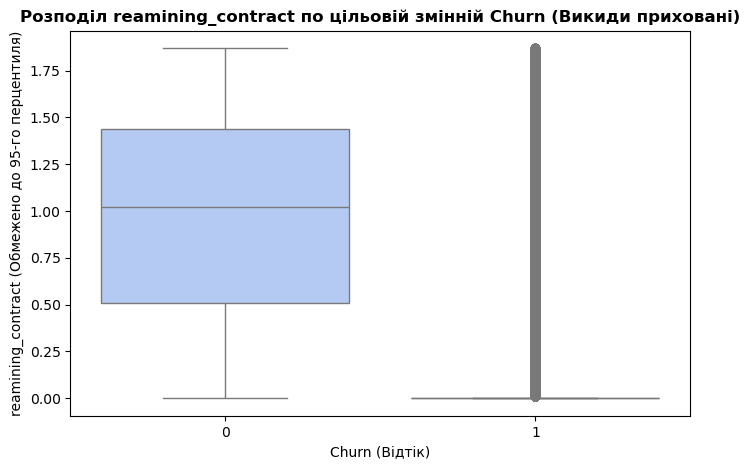

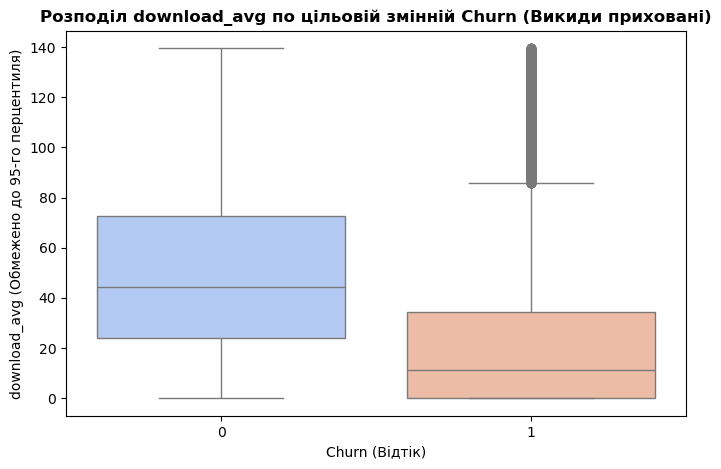

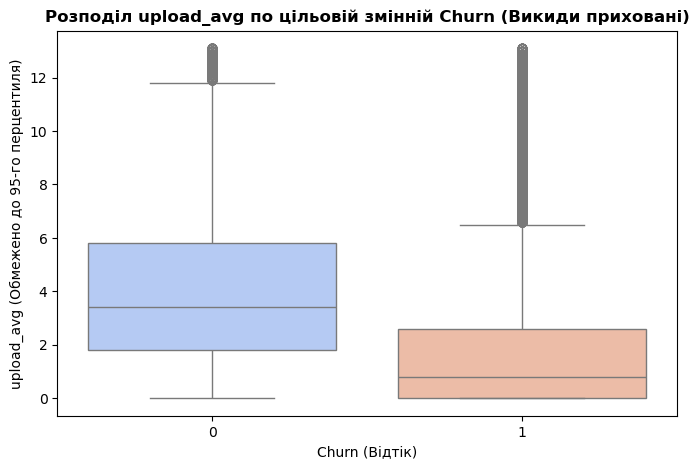

In [33]:
quantile_level = 0.95

for var in continuous_variables:
    # 1. Обчислення порогу (99-й перцентиль) для поточної змінної
    # Використовуємо .dropna(), щоб не враховувати пропущені значення
    limit = df[var].dropna().quantile(quantile_level) 
    
    # 2. Створення тимчасово обрізаного датафрейму для візуалізації
    # Обрізаємо всі значення, що більші за цей поріг
    df_limited = df[df[var] < limit].copy() # Використовуємо .copy() для безпеки
    
    # 3. Побудова Boxplot з обрізаним набором даних
    plt.figure(figsize=(8, 5))
    
    # Побудова Boxplot:
    # - x='churn' (цільова змінна)
    # - y=var (поточна обрізана неперервна змінна)
    sns.boxplot(data=df_limited, x='churn', y=var, palette="coolwarm", hue='churn', legend=False)
    
    plt.xlabel('Churn (Відтік)')
    plt.ylabel(f'{var} (Обмежено до {quantile_level*100:.0f}-го перцентиля)')
    plt.title(f'Розподіл {var} по цільовій змінній Churn (Викиди приховані)', fontweight='bold')
    plt.show()

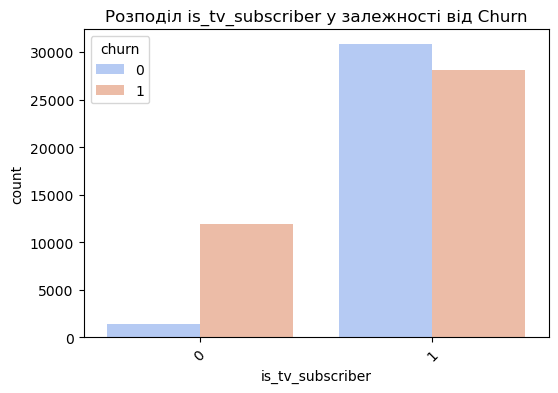

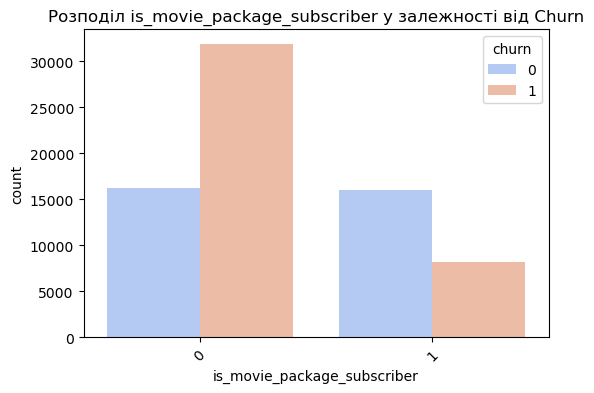

In [34]:

# ============================================
#  Аналіз категоріальних змінних
# ============================================
# categorical_features = df.select_dtypes(include=['object']).columns

for col in categorical_variables:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue="churn", data=df, palette="coolwarm")
    plt.title(f"Розподіл {col} у залежності від Churn")
    plt.xticks(rotation=45)
    plt.show()

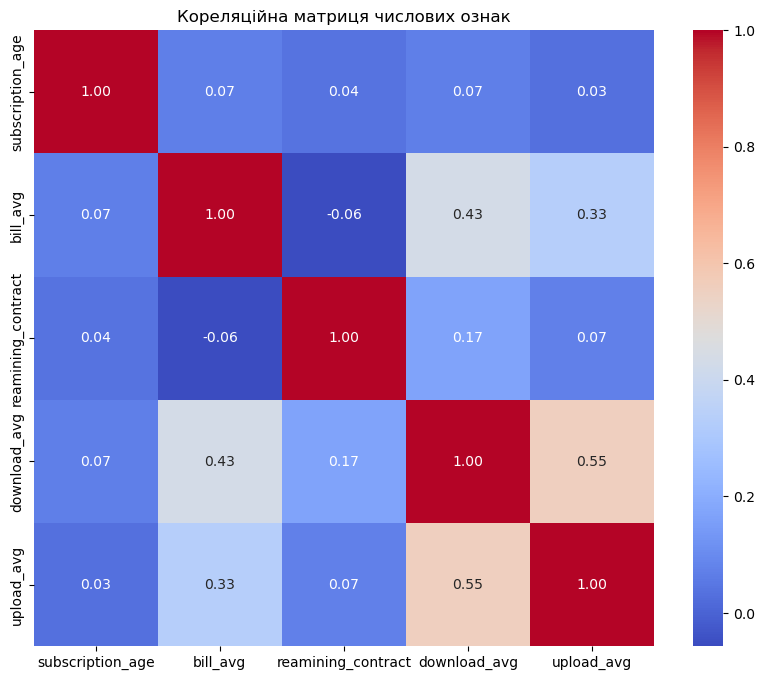

In [35]:

# ============================================
#  Кореляційний аналіз (для числових змінних)
# ============================================
# numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10,8))
sns.heatmap(df[continuous_variables].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Кореляційна матриця числових ознак")
plt.show()


## ✅ Попередні висновки (для заповнення)
- Які ознаки найсильніше впливають на відтік клієнтів?  
- Чи є сильна кореляція між певними змінними?  
- Які дані потребують очищення або трансформації?
